In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
apple=pd.read_csv('C:/Users/lenovo/aapl.csv')
apple=apple.set_index(pd.DatetimeIndex(apple['Date'].values))

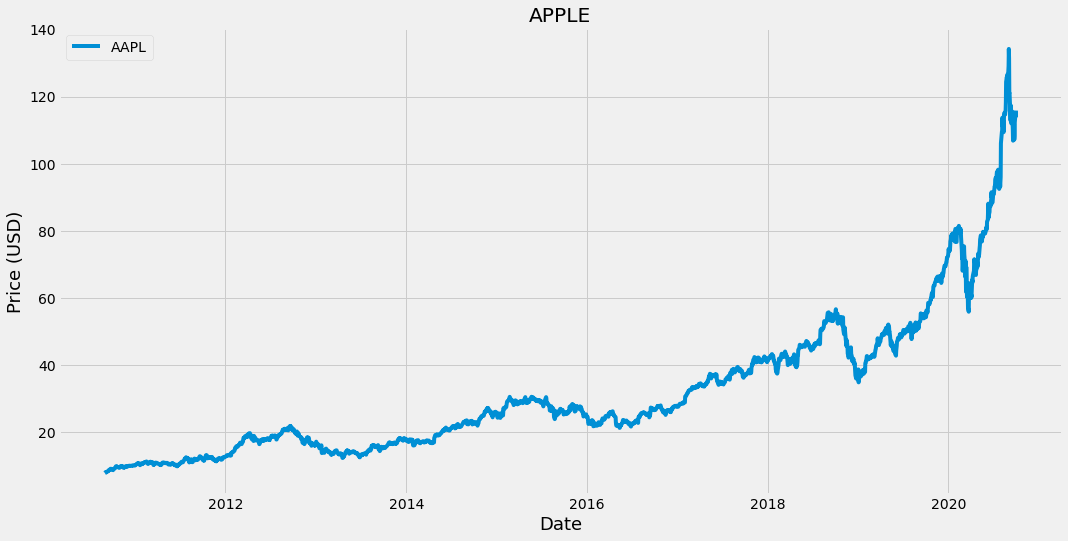

In [3]:
plt.figure(figsize=(16,8))
plt.plot(apple['Adj Close'],label='AAPL')
plt.title('APPLE')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price (USD)',fontsize=18)
plt.legend()
plt.show()

In [4]:
ma30=pd.DataFrame()
ma30['AM']=apple['Adj Close'].rolling(window=30).mean()
ma100=pd.DataFrame()
ma100['AM']=apple['Adj Close'].rolling(window=100).mean()

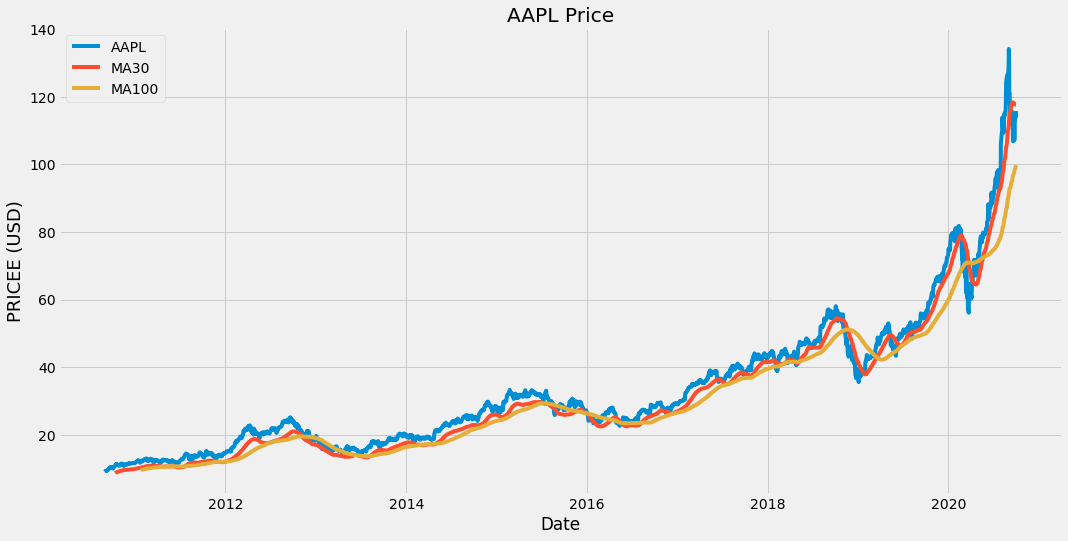

In [5]:
plt.figure(figsize=(16,8))
plt.plot(apple['Close'],label='AAPL')
plt.plot(ma30,label='MA30')
plt.plot(ma100,label="MA100")
plt.title('AAPL Price')
plt.xlabel('Date')
plt.ylabel('PRICEE (USD)',fontsize=18)
plt.legend()
plt.show()

In [6]:
data=pd.DataFrame()
data['AAPL']=apple['Adj Close']
data['MA30']=ma30['AM']
data['MA100']=ma100['AM']

In [7]:
def signal(data) : 
    signalBuy=[]
    signalSell=[]
    f=-1
    for i in range(len(data)):
        if data['MA30'][i]>data['MA100'][i]:
            if f!=1:
                signalBuy.append(data['AAPL'][i])
                signalSell.append(np.nan)
                f=1
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['MA30'][i]<data['MA100'][i]: 
            if f!=0:
                signalBuy.append(np.nan)
                signalSell.append(data['AAPL'][i])
                f=0
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan) 

    return (signalBuy , signalSell )

In [8]:
buy_sell = signal(data)
data['buy signal']=buy_sell[0]
data['sell signal']=buy_sell[1]
data

,AAPL,MA30,MA100,buy signal,sell signal
2010-09-01,7.725714,NaN,NaN,NaN,NaN
2010-09-02,7.782502,NaN,NaN,NaN,NaN
2010-09-03,7.986192,NaN,NaN,NaN,NaN
2010-09-07,7.956563,NaN,NaN,NaN,NaN
2010-09-08,8.114268,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-09-24,108.220001,117.833082,98.214088,NaN,NaN
2020-09-25,112.279999,117.742082,98.596332,NaN,NaN
2020-09-28,114.959999,117.743832,98.997735,NaN,NaN
2020-09-29,114.089996,117.726582,99.382698,NaN,NaN


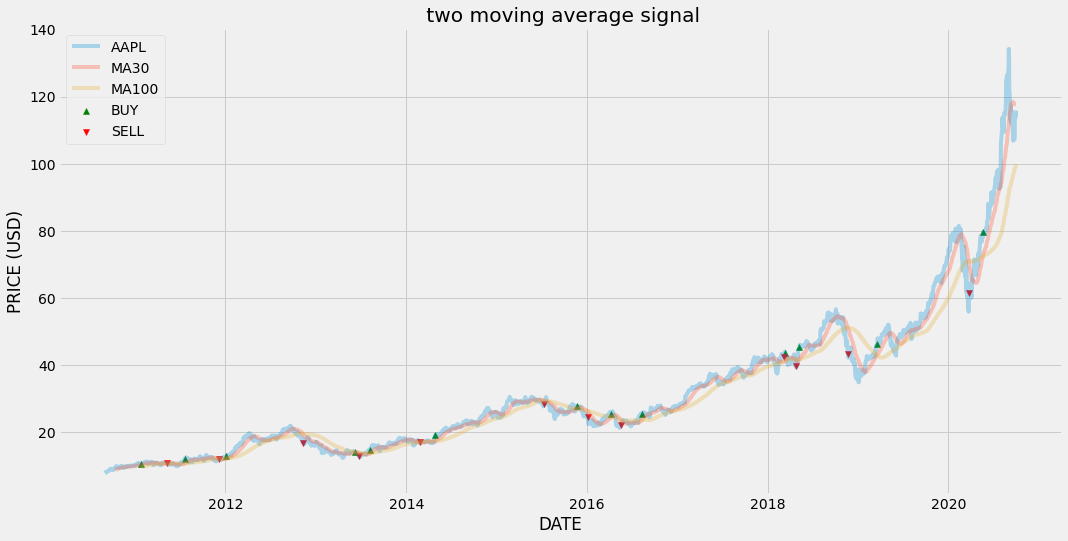

In [9]:
plt.figure(figsize=(16,8))
plt.plot(data['AAPL'],label='AAPL',alpha=0.3)
plt.plot(data['MA30'],label='MA30',alpha=0.3)
plt.plot(data['MA100'],label="MA100",alpha=0.3)
plt.scatter(data.index,data['buy signal'],label='BUY',marker='^',color='g')
plt.scatter(data.index,data['sell signal'],label='SELL',marker='v',color='r')
plt.title(' two moving average signal') 
plt.xlabel('DATE')
plt.ylabel('PRICE (USD)')
plt.legend()
plt.show() 